## Morbius - Sentiment Analysis

The data I've collected could not be considered representative, but they are useful to perform sentiment analysis.

_Import and Setup_

In [14]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
sent_analyzer = SentimentIntensityAnalyzer()

In [4]:
morbius1 = pd.read_csv('../data/Morbius_31-03-22.csv')
morbius2 = pd.read_csv('../data/Morbius_01-04-22.csv')
morbius3 = pd.read_csv('../data/Morbius_02-04-22.csv')
morbius4 = pd.read_csv('../data/Morbius_03-04-22.csv')

In [5]:
morbius = pd.concat([morbius1, morbius2, morbius3, morbius4])
morbius.head()

,Unnamed: 0,Name,Time,Tweet
0,0,Mothra 🦋🇵🇸,2022-03-31 10:50:14+00:00,Not everyone. Feel sad for The New Mutants and...
1,1,Spider-Man Enjoyer,2022-03-31 10:50:13+00:00,@hzjoetv Honestly bro I don’t care about revie...
2,2,9jalover,2022-03-31 10:50:06+00:00,Morbius’ Post Credits Scene Leaked? Ahead of t...
3,3,Jordy 🌱,2022-03-31 10:50:06+00:00,since when was morbius “everyone’s” most antic...
4,4,Buddy Watson,2022-03-31 10:49:56+00:00,Morbius (2022)\n#NowWatching \n\nAlright I’ll ...


In [6]:
morbius = morbius.drop(['Unnamed: 0'], axis=1)
morbius['Time'] = pd.to_datetime(morbius['Time'])
morbius.head()

,Name,Time,Tweet
0,Mothra 🦋🇵🇸,2022-03-31 10:50:14+00:00,Not everyone. Feel sad for The New Mutants and...
1,Spider-Man Enjoyer,2022-03-31 10:50:13+00:00,@hzjoetv Honestly bro I don’t care about revie...
2,9jalover,2022-03-31 10:50:06+00:00,Morbius’ Post Credits Scene Leaked? Ahead of t...
3,Jordy 🌱,2022-03-31 10:50:06+00:00,since when was morbius “everyone’s” most antic...
4,Buddy Watson,2022-03-31 10:49:56+00:00,Morbius (2022)\n#NowWatching \n\nAlright I’ll ...


In [7]:
morbius.dtypes

Name                  object
Time     datetime64[ns, UTC]
Tweet                 object
dtype: object

_Sentiment Analysis_

In [8]:
morbius['Scores'] = morbius['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))

In [9]:
morbius['Compound'] = morbius['Scores'].apply(lambda score_dict:score_dict['compound'])

In [10]:
morbius.head()

,Name,Time,Tweet,Scores,Compound
0,Mothra 🦋🇵🇸,2022-03-31 10:50:14+00:00,Not everyone. Feel sad for The New Mutants and...,"{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'comp...",0.3724
1,Spider-Man Enjoyer,2022-03-31 10:50:13+00:00,@hzjoetv Honestly bro I don’t care about revie...,"{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'comp...",0.9062
2,9jalover,2022-03-31 10:50:06+00:00,Morbius’ Post Credits Scene Leaked? Ahead of t...,"{'neg': 0.155, 'neu': 0.676, 'pos': 0.169, 'co...",0.0516
3,Jordy 🌱,2022-03-31 10:50:06+00:00,since when was morbius “everyone’s” most antic...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Buddy Watson,2022-03-31 10:49:56+00:00,Morbius (2022)\n#NowWatching \n\nAlright I’ll ...,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.2500


In [11]:
morbius.sort_values(by='Time', inplace=True)
morbius.index = pd.to_datetime(morbius['Time'])

morbius['mean'] = morbius['Compound'].expanding().mean()
morbius['rolling'] = morbius['Compound'].rolling('6h').mean()

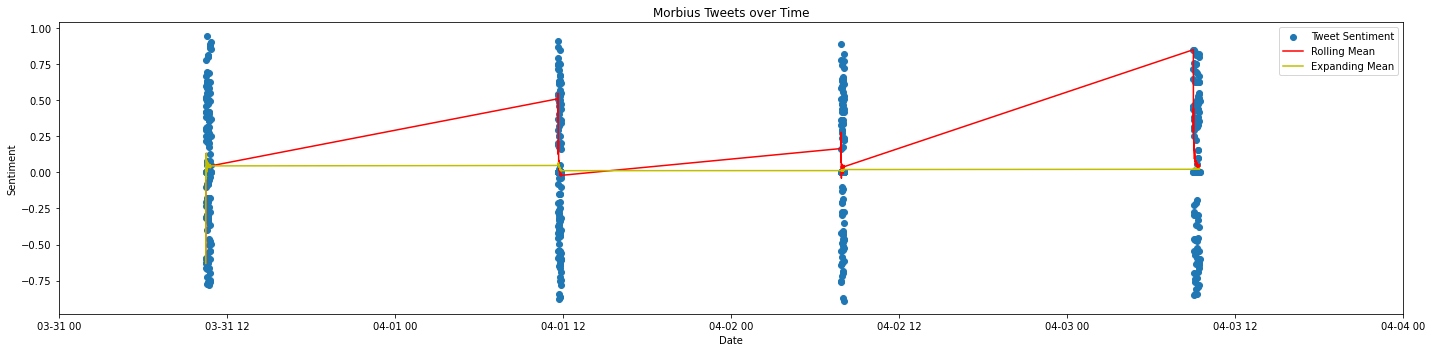

In [16]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(morbius['Time'], morbius['Compound'], label='Tweet Sentiment')
ax.plot(morbius['Time'], morbius['rolling'], color ='r', label='Rolling Mean')
ax.plot(morbius['Time'], morbius['mean'], color='y', label='Expanding Mean')

ax.set_xlim([dt.date(2022,3,31), dt.date(2022,4,4)])
ax.set(title='Morbius Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

_Sentiment Analysis 2_

In [21]:
morbius1['Scores'] = morbius1['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))
morbius2['Scores'] = morbius2['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))
morbius3['Scores'] = morbius3['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))
morbius4['Scores'] = morbius4['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))

In [22]:
morbius1['Compound'] = morbius1['Scores'].apply(lambda score_dict:score_dict['compound'])
morbius2['Compound'] = morbius2['Scores'].apply(lambda score_dict:score_dict['compound'])
morbius3['Compound'] = morbius3['Scores'].apply(lambda score_dict:score_dict['compound'])
morbius4['Compound'] = morbius4['Scores'].apply(lambda score_dict:score_dict['compound'])

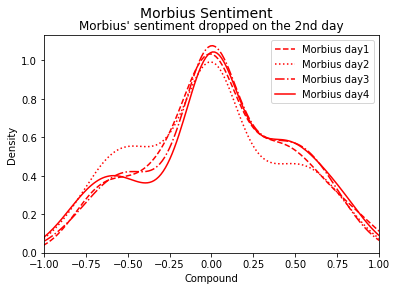

In [27]:
ax1 = sns.kdeplot(data=morbius1, x='Compound', label = 'Morbius day1', color = 'r', linestyle='--')
ax2 = sns.kdeplot(data=morbius2, x='Compound', label = 'Morbius day2', color = 'r', linestyle='dotted')
ax3 = sns.kdeplot(data=morbius3, x='Compound', label = 'Morbius day3', color = 'r', linestyle='-.')
ax4 = sns.kdeplot(data=morbius4, x='Compound', label = 'Morbius day4', color = 'r')

ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax3.set_xlim(-1,1)
ax4.set_xlim(-1,1)

plt.legend()
plt.suptitle('Morbius Sentiment', fontsize=14)
plt.title('Morbius\' sentiment dropped on the 2nd day')
plt.savefig('../figures/morbius.png', dpi=300, bbox_inches = 'tight', facecolor='white', transparent=False)